
# Project: Investigate a Dataset - [noshow appointments patients for 2016]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>


# Introduction

## Dataset Description 

	
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

1- ScheduledDay--> tells us on what day the patient set up their appointment.
2- Neighborhood--> indicates the location of the hospital.
3- Scholarship--> indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.
 Are there trends that can be observed between the selected metrics?
 Have certain regions of the world been growing in your selected metrics better than others


In [58]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd 
import numpy as np 
from  matplotlib  import pyplot as plt
import seaborn as sns
# Remember to include a 'magic word' so that your visualizations are plotted
%matplotlib inline
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


## Data Wrangling

In [59]:
# Load your data and print out a few lines. Perform operations to inspect data
df=pd.read_csv(r'C:\Users\Hp\Downloads\noshowappointments-kagglev2-may-2016.csv')

In [60]:
df.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### General Properties

In [61]:
# dataset consist of 110527 row and 14 column 
df.shape

(110527, 14)

In [62]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [63]:
# summary statistics
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [64]:
# there is no duplicated rows 
df.duplicated().sum()

0

In [65]:
# number or duplicated data for patientId is48228
df['PatientId'].duplicated().sum()

48228

In [66]:
# there is 38710 repeted rows i need to drop it 
df[['PatientId','No-show']].duplicated().sum()

38710

In [67]:
# there is the miss value in column of age =-1 
miss_value=df[df['Age']==-1]
miss_value

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No



## Data Cleaning

 

#### drop the duplicated patientId and now show data

In [68]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop_duplicates(['PatientId','No-show'],inplace=True)
df.shape

(71817, 14)


#### droping the  mised_value

In [69]:
df.drop(index=99832,inplace=True)


#### rename column No-show --> No_show

In [70]:
df.rename(columns={'No-show':'No_show'},inplace=True)
df.head(4)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No


#### drop unncessary columns from df

In [71]:
#drop unncessary columns from df
df.drop(['PatientId','AppointmentID','ScheduledDay'],inplace=True,axis=1)

#### show first 5 rows of data after droped the unessary colmun 

In [72]:
df.head()

,Gender,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No



## Exploratory Data Analysis



#### take alook on the all of dataframe with histogram


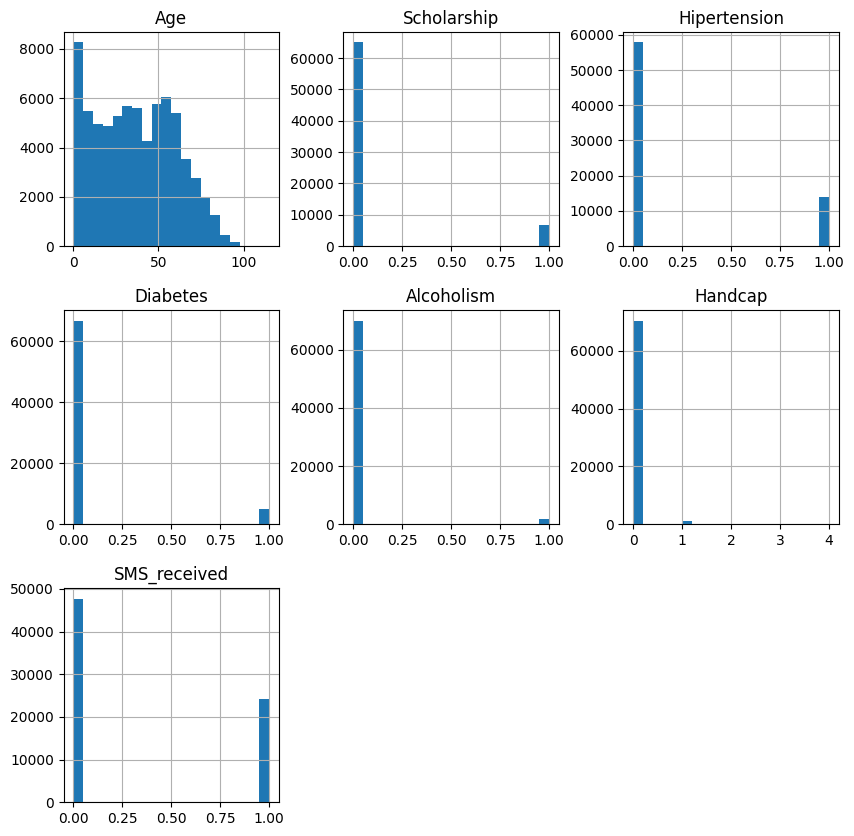

In [73]:
df.hist(figsize=(10,10),bins=20);

#### I will chop the data to two pieces the patient how attend and not attended

In [74]:
# the attended patient when the word is yes 
attended_patient =df.No_show=='Yes'
attended_patient


0         False
1         False
2         False
3         False
4         False
          ...  
110518    False
110520    False
110521    False
110522    False
110524    False
Name: No_show, Length: 71816, dtype: bool

In [75]:
# the count for attended patient
attended_count=attended_patient.count()
attended_count

71816

In [76]:
# the patient that not attended to appointmentDay
not_attended_patient=df.No_show =='No'
not_attended_patient

0         True
1         True
2         True
3         True
4         True
          ... 
110518    True
110520    True
110521    True
110522    True
110524    True
Name: No_show, Length: 71816, dtype: bool

In [77]:
not_attended_count=not_attended_patient.count()
not_attended_count


71816

#### that show su that  [not_attended_count ] is biger than [atteded_count] with 3 times

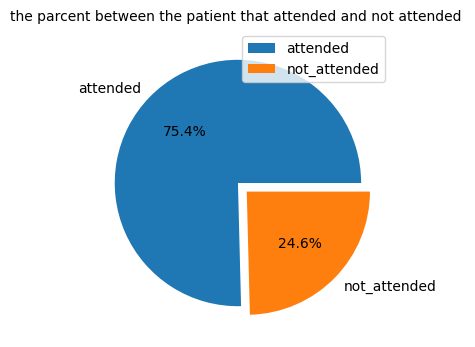

In [78]:
# the realationship between the attended patient and not attended patient 
all_patients_count=df['No_show'].value_counts()
plt.pie(all_patients_count,labels=["attended", "not_attended"], autopct='%1.1f%%',explode=[0,.1])
plt.title("the parcent between the patient that attended and not attended ",fontsize=10)
plt.legend()
fig=plt.gcf()
fig.set_size_inches(4,4)
plt.show()

#### the pie chart show us the parcent between the attended patient and not attended 

### Q1- is there arealationship between the age and Diabetes

In [79]:
# the patint of daibetes 
has_diabetes= df[df['Diabetes']==1]
has_diabetes=has_diabetes['Diabetes']
has_diabetes

4         1
36        1
37        1
41        1
44        1
         ..
110129    1
110151    1
110168    1
110456    1
110468    1
Name: Diabetes, Length: 5096, dtype: int64

In [80]:
# the patient didn't have diabetes
not_has_daibetes=df[df['Diabetes']==0]
not_has_daibetes=not_has_daibetes['Diabetes']
not_has_daibetes

0         0
1         0
2         0
3         0
5         0
         ..
110518    0
110520    0
110521    0
110522    0
110524    0
Name: Diabetes, Length: 66720, dtype: int64

In [81]:
len(not_has_daibetes)/len(has_diabetes)

13.092621664050235

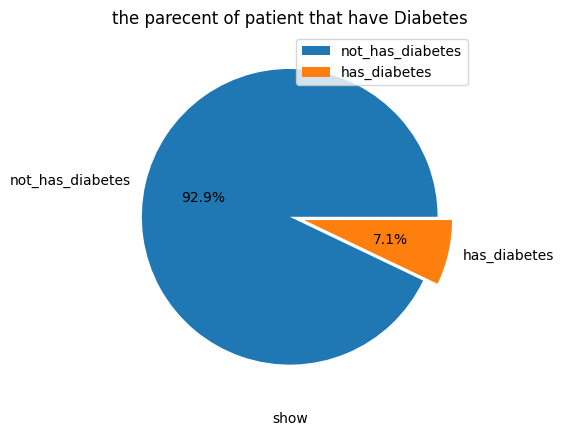

In [82]:
count_diabetes=df['Diabetes'].value_counts()
plt.pie(count_diabetes,labels=['not_has_diabetes','has_diabetes'], autopct='%1.1f%%',explode=[0,.1])
plt.title('the parecent of patient that have Diabetes')
plt.xlabel('show')
plt.legend();

#### as we see here there is 13 times number of patient dont have daibetes more than the other patient

### Q1: who are the most attendce and missed neighborhood

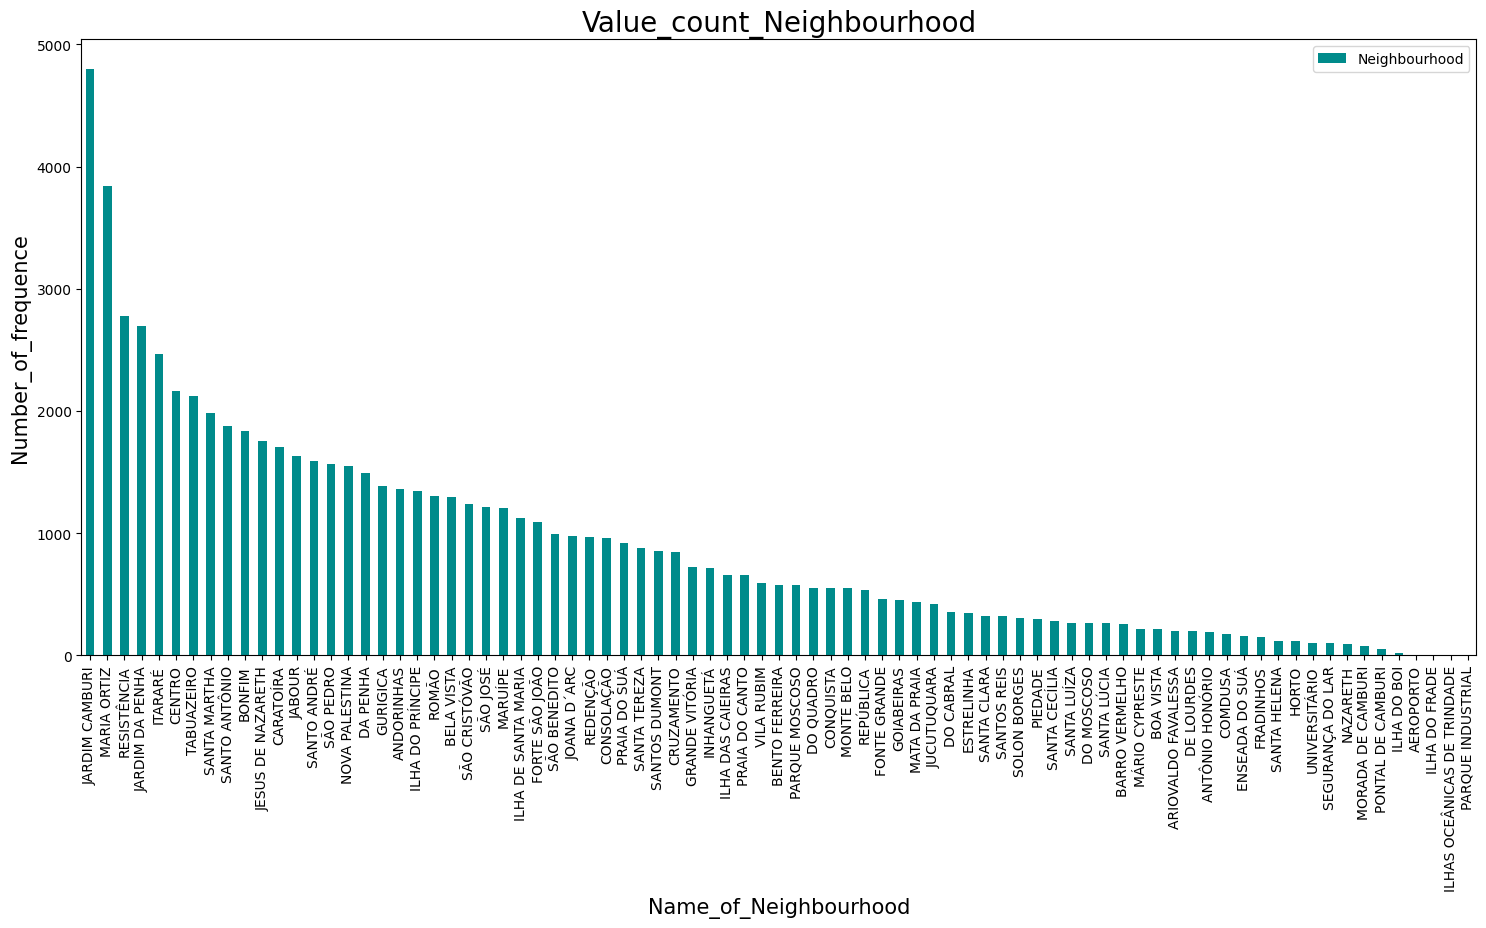

In [83]:
df["Neighbourhood"].value_counts().plot(kind='bar',figsize=(18,8),color='#008B8B')
plt.legend()
plt.title('Value_count_Neighbourhood',fontsize=20)
plt.xlabel('Name_of_Neighbourhood',fontsize=15)
plt.ylabel('Number_of_frequence',fontsize=15);

#### answer Q1: as we see  that [ JARDIM CAMBURI] the most popular Neighbourhood and the missed is [PARQUE INDUSTRIAL]

### Q2: is there arealatin between the age and attendance

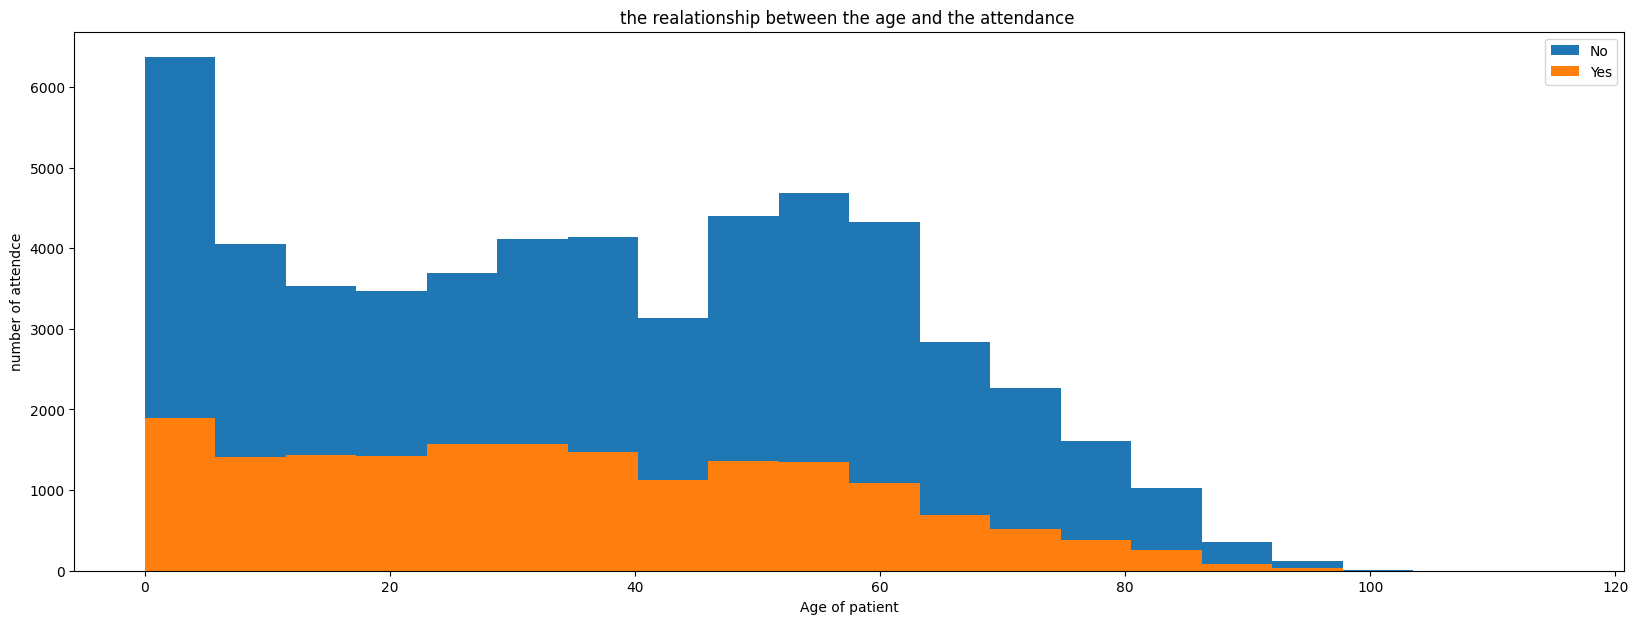

In [84]:
# I will use the groupby to compare beween two columns Neighbourhood and 
plt.figure(figsize=[20,7])
df.groupby('No_show')['Age'].plot(kind='hist',bins=20)
plt.xlabel('Age of patient')
plt.legend()
plt.ylabel('number of attendce')
plt.title('the realationship between the age and the attendance ');

#### answer Q2:it is so clear that from 0 to 5 go in their attendance and from 45 to 63 go too in their attendance  and the rest didn't go 

### Q3: is there realation beween the [SMS_received] and [No_show]

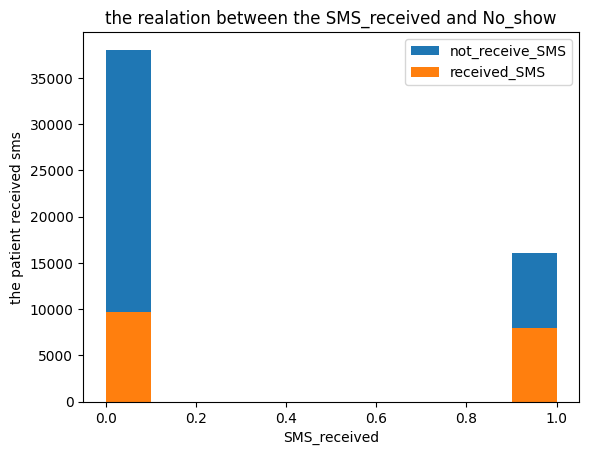

In [85]:
df.groupby('No_show')['SMS_received'].plot(kind='hist')
plt.legend(labels=['not_receive_SMS','received_SMS'])
plt.xlabel('SMS_received')
plt.ylabel('the patient received sms')
plt.title('the realation between the SMS_received and No_show');

#### answer Q3: there is something ronge and we need to ensure about the campain of SMS_received because the parcentage of patinet attended is more than patient that received sms and didn't attended 

### Q4: is the Hipertension realated with Age 

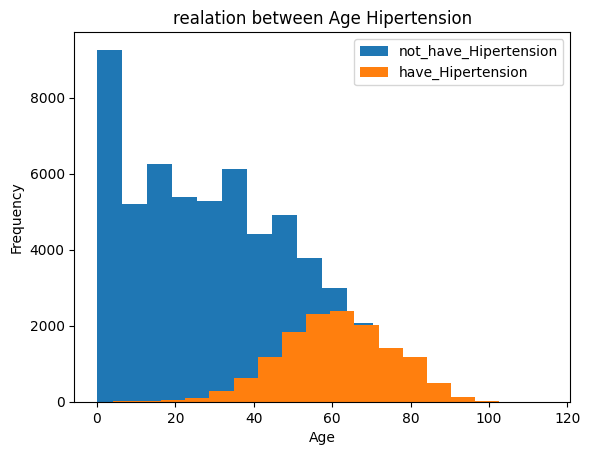

In [86]:
# ploting the patient have Hipertension and patient don't have
df.groupby('Hipertension')['Age'].plot(kind='hist',bins=18)
plt.xlabel('Age')
plt.legend(labels=['not_have_Hipertension','have_Hipertension'])
plt.title('realation between Age Hipertension');

#### answer Q4: as we see the max num of patient have Hipertension is from 50 to 68 years old and the as it so clear to us from 0 to 20 there is min parcentage of num of patient did not have Hipertension

### Q5: what is the parcentage between the male and famle in the dataset

In [87]:
kind=df['Gender'].value_counts()
kind

F    46466
M    25350
Name: Gender, dtype: int64

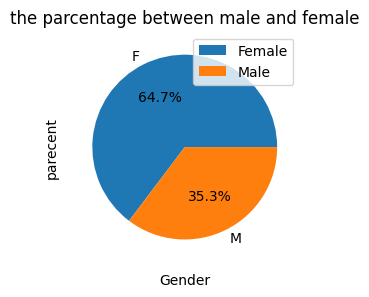

In [88]:
# funcion about  the Gender female and male
def the_type(df,col):
    df[col].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%',title='the parcentage between male and female' )
    plt.xlabel('Gender')
    plt.ylabel('parecent')
    fig=plt.gcf()
    fig.set_size_inches(4,3)
    plt.legend(labels=['Female','Male'])
the_type(df,'Gender');

#### answer Q5: as we see male is less than the female 

<a id='conclusions'></a>
## Conclusions
##### 1- The parecent of the patien who didn't attended to show is more 3 times than the poeple who attended
##### 2- The number of patient of daibetes is less than patient didn't have daibetes by 13 times
##### 3- As we see that JARDIM CAMBURI the most popular Neighbourhood and the less popular Neighbourhood is PARQUE INDSTRAL
##### 4- It's so clear that the parents car about thier chiledrn from 0 to 5 years and from 45 to 63 years to 
##### 5- the number of patient that atteded and didn't had the SMS is more than the patient not atteded and receive the SMS we need to review the campain of SMS
##### 6- As we see that the most patient have Hipertension is from 50 to 68 year old and from 0 to 20 years is most patient didn't have the Hipertension
##### 7- there is nuber of female is more than male in the dataset 


## limitations
#####  We need to review the campain of SMS beacuase there is number of patient that received the SMS and didn't attended is less than the number of patient that didn't received the SMS and they attended 

In [89]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1